In [1]:
%load_ext autoreload

In [20]:
%autoreload 2

import os
import io
import sys
import ast
sys.path.append(os.path.join(os.getcwd(), '..','..'))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from premier_league_models.processing.preprocess import generate_cnn_data, split_preprocess_cnn_data, preprocess_cnn_data
from premier_league_models.rnn.model import build_train_rnn, full_rnn_pipeline
from premier_league_models.processing.evaluate import gridsearch_analysis
import random
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import torch


from config import STANDARD_CAT_FEATURES, STANDARD_NUM_FEATURES, NUM_FEATURES_DICT


# Run Full Training

======= Generating CNN Data for Season: ['2020-21', '2021-22', '2022-23', '2023-24', '2024-25'], Position: MID =======
Dropping Players with Avg. Playtime < 45...

Total players of type MID = 1657.
1188 players dropped due to low average playtime.
Generated windowed dataframe for CNN of shape: (10448, 7).
Generated combined features dataframe for preprocessing of shape: (16030, 19).

========== EDA ==========
========== Done Generating CNN Data ==========

========== Splitting CNN Data ==========

=== Stratifying Split by : Stdev ===
Shape of windowed_df: (10448, 7)
Shape of a given window (prior to preprocessing): (12, 19)
stdev Distribution of Players:

========== Preprocessing CNN Data ==========

Mean of Standard Scaler:
[2.93200000e+00 6.53075789e+01 1.35368421e-01 1.23684211e-01
 1.00452632e+00 2.16842105e-01 1.17690526e+01 1.26421053e-01
 2.73684211e-03 1.26315789e-03 4.34769474e+00 1.47762947e+01
 1.51822000e+01 1.35129474e+01 4.99052632e-01 3.19231579e+00
 3.08821053e+00 1.041

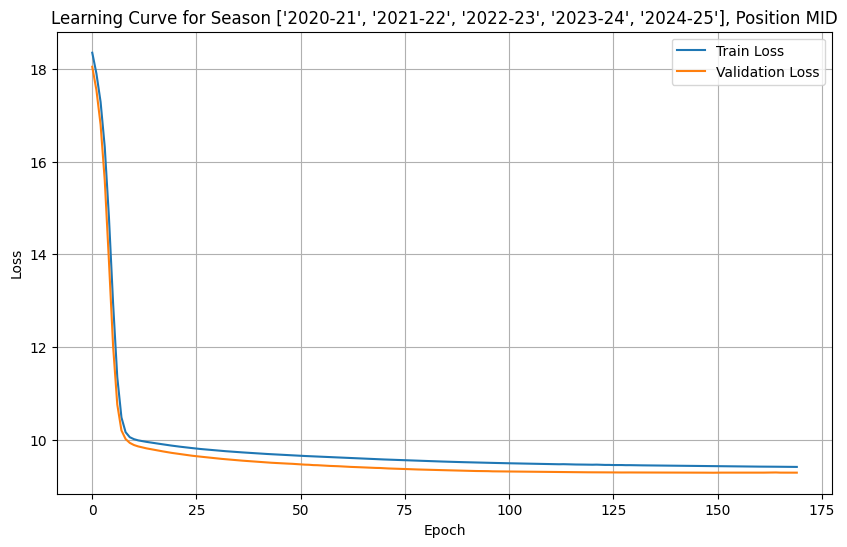

X input shape:
(12, 18)
d input shape:
(1,)


c:\Users\Dean\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\onnx\symbolic_opset9.py:4545: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with RNN_TANH can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


(rnnModel(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (rnn): RNN(18, 64, batch_first=True, bidirectional=True)
   (attention): TemporalAttention(
     (W): Linear(in_features=128, out_features=64, bias=False)
     (v): Linear(in_features=64, out_features=1, bias=False)
   )
   (linear_relu_stack): Sequential(
     (0): Linear(in_features=129, out_features=32, bias=True)
     (1): ReLU()
     (2): Linear(in_features=32, out_features=1, bias=True)
   )
 ),
 {'train_mse': 9.412341117858887,
  'train_mae': 2.101460635365284,
  'val_mse': 9.292901039123535,
  'val_mae': 2.0784569299227647,
  'test_mse': 8.246321678161621,
  'test_mae': 1.992139577882353,
  'spear_corr': 0.40279826758502263})

In [ ]:
SEED = 444

random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

DATA_DIR = os.path.join(os.getcwd(), '..', 'data', 'clean_data')
POSITION = "FWD"

full_rnn_pipeline(DATA_DIR,
                season = ['2020-21', '2021-22', '2022-23', '2023-24', '2024-25'], 
                position = POSITION, 
                window_size=12,
                num_filters=64,
                num_dense=64,
                bidirectional=True,
                temporal_attention=True,
                batch_size = 32,
                epochs = 2000,  
                drop_low_playtime = True,
                low_playtime_cutoff = 45,
                num_features = NUM_FEATURES_DICT[POSITION]["large"],
                cat_features = STANDARD_CAT_FEATURES, 
                stratify_by = 'stdev', 
                conv_activation = 'relu',
                dense_activation = 'relu',
                optimizer='adam',
                learning_rate= 0.00001,  
                loss = 'mse',
                metrics = ['mae'],
                verbose = True,
                regularization = 0.01, 
                early_stopping = True, 
                tolerance = 1e-5, # only used if early stopping is turned on, threshold to define low val loss decrease
                patience = 20,   # num of iterations before early stopping bc of low val loss decrease
                plot = True, 
                draw_model = False,
                standardize= True,)

# GridSearch for Best Model

In [ ]:
from premier_league_models.rnn.experiment import gridsearch_rnn

gridsearch_rnn(experiment_name = "rnn_eval_big", verbose = True)

#PERFORMING VIA COMMAND LINE SCRIPT NOW FOR EFFICIENCY